# Занятие 2.5

## Аннотация
Пятое занятие посвящено словарям и методам работы с ними в Python.

# 1. Создание словаря

Продолжим знакомиться с коллекциями сложной структуры в Python.

Словарь (dictionary) в Python — это **изменяемая** структура данных, предназначенная для хранения коллекции пар ключ-значение. Словари очень похожи на списки, однако в словаре для каждого элемента можно самому определить «индекс», по которому он будет доступен. Этот индекс называется "ключом".
Словари являются одним из наиболее полезных и распространенных типов данных в Python. Они иногда называются ассоциативными массивами или хеш-таблицами в других языках программирования.

Элементы словаря перечисляются в фигурных скобках (как и элементы множества) и разделяются запятой. До двоеточия указывается **ключ**, а после двоеточия — **значение**, доступное в словаре по этому ключу. Пара "ключ: значение" называется записью.

Назначение словаря — устанавливать связь между значениями и объектами любых типов. Поэтому, ключи могут быть значениями только неизменяемых типов, например, число, строка, кортеж (tuple). Если нужно использовать в качестве ключа список, матрицу или какой-то изменяемый тип, то нужно преобразовать изменяемый тип в подходящий неизменяемый тип, например, в tuple.

Пример простого словаря:

In [ ]:
new_dict = {"name": "Вася", "age": 20}

Основные характеристики словарей в Python:
* Неупорядоченность: элементы словаря не имеют определенного порядка. В Python версий до 3.7 словари были неупорядоченными коллекциями, но начиная с версии 3.7 и выше они также сохраняют порядок вставки элементов.
* Изменяемость: в словарях можно добавлять, изменять и удалять элементы.
* Уникальность ключей: в одном словаре не может быть двух одинаковых ключей. Если вы попытаетесь добавить элемент с существующим ключом, старое значение будет перезаписано новым.
* Итерируемость: можно перебирать ключи или значения словаря с помощью циклов for.
* Гетерогенность: словари могут содержать ключи и значения разных типов данных.

Пустой словарь создается очень просто, с помощью фигурных скобок:

In [ ]:
new_dict = {}

Новые элементы в словаре задаются парой ключ-значение. Можно воспользоваться функцией dict(), передав в неё аргументы, или указать значения напрямую:

In [ ]:
a = dict(one=1, two=2, three=3)
b = {'one': 1, 'two': 2, 'three': 3}
print(a)
print(b)

{'one': 1, 'two': 2, 'three': 3}
{'one': 1, 'two': 2, 'three': 3}


С помощью функции высшего порядка zip() можно составить словарь из двух списков (если какой-то из списков окажется короче, то zip обрежет остальное):

In [ ]:
c = dict(zip(['one', 'two', 'three'], [1, 2, 3, 4]))
print(c)

{'one': 1, 'two': 2, 'three': 3}


Также можно воспользоваться кортежами или комбинировать разные методы:

In [ ]:
d = dict([('one', 1), ('two', 2), ('three', 3)])
e = dict({'one': 1, 'two': 2}, three=3)
print(d)
print(e)

{'one': 1, 'two': 2, 'three': 3}
{'one': 1, 'two': 2, 'three': 3}


Здесь:
* `'one', 'two', 'three'` — это **ключи**,
* `1, 2, 3` — это **значения**,
* `'one': 1, 'two': 2, 'three': 3` — это **записи**.

Ещё для создания словаря можно воспользоваться словарным выражением:

In [ ]:
f = {k: k for k in range(3)}
print(f)

{0: 0, 1: 1, 2: 2}


Из этого примера видно, что ключами для словаря могут быть не только строки, но и числа.

C помощью функции issubclass() мы можем убедиться, что словарь это тоже класс-наследник коллекций со всеми вытекающими из этого свойствами:

In [ ]:
from collections.abc import Collection
print(issubclass(dict, Collection))

True


# 2. Обращение к элементам словаря

Так как словари являются изменяемой структурой данных, можно добавлять новые элементы, изменять их или удалять. Читаются элементы точно так же, как в списках, только вместо целочисленного индекса в квадратных скобках указывается ключ:

In [ ]:
gradebook = {"Вася": 5, "Коля": 4, "Петя": 2, "Аня": 3}
print(gradebook["Коля"])  # обращение по ключу

4


Однако в словарях нельзя обратиться к записи по номеру. Это связано с тем, что формально словари в Python не упорядочены. Например:

In [ ]:
gradebook[0]  # ошибка

KeyError: 0

Изменение значения в словаре:

In [ ]:
gradebook['Петя'] = 5  # изменение данных
gradebook

{'Вася': 5, 'Коля': 4, 'Петя': 5, 'Аня': 3}

Если обратиться к несуществующему элементу по ключу и присвоить значение, эта запись будет автоматически добавлена в словарь:

In [ ]:
gradebook['Инна'] = 4  # добавление новой записи
gradebook

{'Вася': 5, 'Коля': 4, 'Петя': 2, 'Аня': 3, 'Инна': 4}

Несуществующую запись прочитать тоже нельзя:

In [ ]:
gradebook['Илья']  # такого элемента нет

KeyError: 'Илья'

### Операции со словарями

Как и другие типы коллекций, словари поддерживают множество методов работы со своими записями.

#### **Метод keys()**
Получение всех ключей словаря:

In [ ]:
all_keys = gradebook.keys()
print(all_keys)

dict_keys(['Вася', 'Коля', 'Петя', 'Аня', 'Инна'])


#### **Метод values()**
Получение всех значений словаря:

In [ ]:
all_values = gradebook.values()
print(all_values)

dict_values([5, 4, 5, 3, 4])


#### **Метод items()**
Получение всех пар ключ-значение словаря:

In [ ]:
all_items = gradebook.items()
print(all_items)

dict_items([('Вася', 5), ('Коля', 4), ('Петя', 5), ('Аня', 3), ('Инна', 4)])


#### **Метод get()**

Взять значение в словаре можно не только с помощью квадратных скобок, но и с помощью метода `get`. В этом случае при отсутствии ключа он вернет вместо ошибки значение None.

In [ ]:
print(gradebook.get('Илья'))

None


Можно передать get() второй аргумент, и он будет возвращен, если искомого ключа в словаре нет:

In [ ]:
gradebook.get('Илья', 'No such student')

'No such student'

#### **Метод pop()**
Удаляет элемент из словаря по ключу, при этом возвращая его значение:

In [ ]:
gradebook = {'Вася': 5, 'Коля': 4, 'Петя': 5, 'Аня': 3, 'Инна': 4}
student = gradebook.pop('Инна')
print(student)
print(gradebook)

4
{'Вася': 5, 'Коля': 4, 'Петя': 5, 'Аня': 3}


#### **Оператор in**
Проверка наличия элемента в словаре:

In [ ]:
if "Аня" in gradebook:
    print("Ключ 'Аня' присутствует в словаре")

Ключ 'Аня' присутствует в словаре


Ещё примеры:

In [ ]:
print('Коля' in gradebook)  # проверка наличия ключа в словаре
print('Илья' in gradebook)  # проверка наличия ключа в словаре
print(1 in gradebook.values())  # проверка наличия значения в словаре
print(4 in gradebook.values())  # проверка наличия значения в словаре

True
False
False
True


# 3. Итерация по словарю

Обойти словарь можно разными способами. Например, используя цикл for:

In [ ]:
# перебор по ключам в словаре
for key in gradebook:
    print(key)

Вася
Коля
Петя
Аня
Инна


In [ ]:
# перебор по ключам словаря с помощью метода keys()
for key in gradebook.keys():
    print("Ученик", key, "имеет оценку", gradebook[key])

Ученик Вася имеет оценку 5
Ученик Коля имеет оценку 4
Ученик Петя имеет оценку 5
Ученик Аня имеет оценку 3


In [ ]:
# перебор по значениям словаря c помощью метода values()
for value in gradebook.values():
    print(value)


5
4
5
3


Полностью достать все пары ключ-значение можно с помощью метода items:

In [ ]:
# перебор пар ключ-значение с помощью метода items()
for key, value in gradebook.items():
    print("Ученик", key, "имеет оценку", value)

Ученик Вася имеет оценку 5
Ученик Коля имеет оценку 4
Ученик Петя имеет оценку 5
Ученик Аня имеет оценку 3


Пример.  
В словаре `gradebook` найти учеников с оценкой "4".

In [ ]:
gradebook = {'Вася': 5, 'Коля': 4, 'Петя': 5, 'Аня': 3, 'Инна': 4, 'Жанна': 4}
for key, value in gradebook.items():
    if value == 4:
        print(key)


Коля
Инна
Жанна


# 4. Сортировка словаря

Довольно часто происходит ситуация, когда полученный словарь необходимо отсортировать. Сортировка помогает:
* Визуализировать данные в упорядоченном виде для упрощения анализа и повышения читаемости.
* Проводить итерацию по словарю с гарантией, что значения будут обрабатываться в определенном порядке.
* Быстро находить наибольшие и наименьшие значения в словаре по ключам или значениям.

Отсортировать словарь в Python можно тремя разными способами:
* по ключам (не трогая значения),
* по значениям (не трогая ключи),
* по значениям и ключам одновременно.

 Самый простой способ сделать сортировку **по ключу** — это вызвать метод items, к которому затем применить функцию sorted.

In [ ]:
sorted(gradebook.items())

[('Аня', 3), ('Вася', 5), ('Жанна', 4), ('Инна', 4), ('Коля', 4), ('Петя', 5)]

Список с парами ключ-значение сортируется лексикографически (сначала сравнивается ключ, потом значение). Однако в словаре *все ключи уникальны*,  поэтому при сортировке sorted сравниваются только ключи, нет необходимости потом сортировать значения. Результатом будет являться список кортежей с парами ключ-значение, поэтому если для работы снова нужен словарь, нужно воспользоваться функцией dict:

In [ ]:
sorted_names = dict(sorted(gradebook.items()))
print(sorted_names)

{'Аня': 3, 'Вася': 5, 'Жанна': 4, 'Инна': 4, 'Коля': 4, 'Петя': 5}


Поскольку в данном случае ключи являются строками, мы получили отсортированный словарь по алфавиту. Можно использовать флаг `reverse=True`, чтобы получить результат в обратном порядке:

In [ ]:
sorted_names = dict(sorted(gradebook.items(), reverse=True))
print(sorted_names)

{'Петя': 5, 'Коля': 4, 'Инна': 4, 'Жанна': 4, 'Вася': 5, 'Аня': 3}





Чтобы отсортировать словарь **по значениям**, можно воспользоваться параметром key функции sorted. Создадим для этого лямбда-функцию, которая сортирует по второму элементу:

In [ ]:
sorted_grades = dict(sorted(gradebook.items(), key=lambda item: item[1]))
print(sorted_grades)

{'Аня': 3, 'Коля': 4, 'Инна': 4, 'Жанна': 4, 'Вася': 5, 'Петя': 5}


Получился отсортированный по увеличению оценки словарь. Однако ключи всё еще находятся в том порядке, в каком они были в исходном словаре (в старых версиях Python порядок может быть случайным). Если мы хотим сравнить два отсортированных по значению словаря, мы должны отсортировать их по ключам тоже.

Для сортировки **по значениям и ключам** одновременно можно воспользоваться таким же методом. Поменяем лямбда-функцию, пусть она возвращает сразу кортеж:

In [ ]:
sorted_grades = dict(sorted(gradebook.items(), key=lambda item: (item[1], item[0])))
print(sorted_grades)

{'Аня': 3, 'Жанна': 4, 'Инна': 4, 'Коля': 4, 'Вася': 5, 'Петя': 5}


Здесь благодаря тому, что мы указали сначала `item[1]`, происходит сортировка по значениям, а затем у одинаковых значений сортируются ключи. Как уже говорилось выше, сортировка пары в другом порядке (ключ, потом значение) не имеет смысла — в словарях не может быть одинаковых ключей.

Помните, что после сортировки создается новый объект. Обновить словарь, поменяв местами расположение пар, нельзя. Так что если вам не нужен несортированный словарь, то просто переприсвойте старой переменной другое значение. А если ваш словарь занимает очень много места в памяти — задумайтесь, возможно с самого начала его стоит заменить на список кортежей, для более эффективной работы и экономии места.

#### **Операторы распаковки** * и **


Оператор * используется для распаковки итерируемых объектов, таких как списки или кортежи. При использовании перед итерируемым объектом оператор * распаковывает его во время вызова функции. После этого элементы итерируемого объекта передаются в качестве аргумента функции:

In [ ]:
def summ(x, y, z):
    return x + y + z

values = [10, 20, 30]
res = summ(*values)
print(res)

60


Сравните два способа вывода списка на экран — с помощью оператора распаковки и без:

In [ ]:
values = [10, 20, 30]
print(values)
print(*values)  # равносильно print(values[0], values[1], values[2])

[10, 20, 30]
10 20 30


Оператор ** используется для упаковки и распаковки словарей. При использовании перед словарем во время вызова функции оператор ** распаковывает пары ключ-значение словаря в аргументы ключевых слов, которые могут быть переданы в функцию:

In [ ]:
def about(name, age):
    print(f"Name: {name}")
    print(f"Age: {age}")

human = {"name": "John", "age": 30}
about(**human)  # равносильно about(name="Jorn", age=30)

Name: John
Age: 30


Подробнее о словарях можно почитать в официальной документации по [ссылке](https://docs.python.org/3/library/stdtypes.html?highlight=list#mapping-types-dict).

### Применение словарей

**Итак**, когда же нужно использовать словари:

* Подсчет числа каких-то объектов. В этом случае нужно завести словарь, в котором ключами являются объекты, а значениями — их количество.
* Хранение каких-либо данных, связанных с объектом. Ключи — объекты, значения — связанные с ними данные. Например, если нужно по названию месяца определить его порядковый номер.
* Установка соответствия между объектами (например, “родитель—потомок”). Ключ — объект, значение — соответствующий ему дочерний объект.
* Если нужен обычный массив, но максимальное значение индекса элемента очень велико, и при этом будут использоваться не все возможные индексы (так называемый “разреженный массив”), то можно использовать ассоциативный массив для экономии памяти.

### Модуль collections

Модуль **collections** — это встроенный модуль в Python, который содержит коллекции, альтернативные традиционным **dict**, **list** и **tuple**.

In [ ]:
import collections

**collections.Counter** — вид словаря, который позволяет подсчитывать количество вхождений или наиболее (наименее) часто встречающихся элементов. Принимает итерируемый аргумент и возвращает словарь, в котором ключами служат индивидуальные элементы, а значениями – количества повторений элемента в переданной последовательности.

Имеет несколько методов:
* `elements()` - возвращает список элементов в лексикографическом порядке.
* `most_common([n])` - возвращает `n` наиболее часто встречающихся элементов, в порядке убывания встречаемости. Если `n` не указано, возвращаются все элементы.
* `subtract([iterable-or-mapping])` - вычитание.

**collections.OrderedDict** — ещё один похожий на словарь объект, причем он помнит порядок, в котором ему были даны ключи.

Имеет методы:

* `popitem(last=True)` — удаляет последний элемент если last=True, и первый, если last=False.

* `move_to_end(key, last=True)` — добавляет ключ в конец если last=True, и в начало, если last=False.

Описание других объектов модуля **collections** можно посмотреть в официальной документации:  
https://docs.python.org/3/library/collections.html



Пример 1.  
Посчитаем, сколько раз встречается каждая буква в слове «абракадабра». Воспользуемся collections.Counter:

In [ ]:
string = list('абракадабра')
letter_count = collections.Counter(string)
print(letter_count)

Counter({'а': 5, 'б': 2, 'р': 2, 'к': 1, 'д': 1})


Пример 2.  
Найдем три наиболее часто встречающихся символа в строке «абракадабра» и три уникальных символа

In [ ]:
# без передачи аргумента выводятся все элементы в порядке от наиболее частых к наиболее редким
# метод most_common возвращает список кортежей вида (ключ, число повторений).

print(letter_count.most_common(3))
print(letter_count.most_common()[:-3:-1])

[('а', 5), ('б', 2), ('р', 2)]
[('д', 1), ('к', 1)]


Пример 3.  
Найдем пять самых часто встречающихся слова в утверждениях Zen of Python.

In [ ]:
import this


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Создадим переменную <b>zen</b>, куда считаем все утверждения:

In [ ]:
zen = '''Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!'''

Воспользуемся Counter и most_common:

In [ ]:
from collections import Counter

cleaned_list = []
for word in zen.split():
    cleaned_list.append(word.strip('.,-!').lower())  # очищаем строку от знаков и приводим к нижнему регистру

print(Counter(cleaned_list).most_common(5))  # вызываем Counter и обращаемся к методу most_common

[('is', 10), ('better', 8), ('than', 8), ('to', 5), ('the', 5)]


# 5. * Хэш-таблицы

Рассмотрим, как устроены словари изнутри.

В языках программирования есть понятие **ассоциативный массив** — абстрактный тип данных, с помощью которого хранятся пары «ключ-значение». В разных языках ему соответствуют разные типы данных. В Python это **словарь**.

В обычном индексированном массиве значения расположены по индексам, а значит его можно положить в память «как есть». С ассоциативными массивами все работает по-другому. У них нет индексов, которые бы могли определить порядок — значит, и нет простого способа добраться до значений.

Для реализации ассоциативных массивов часто используют специальную структуру данных — **хеш-таблицу**.

Хеш-таблица использует обычный индексированный массив и функцию для хеширования ключей.


#### Хэширование (хэш-функция)

Любая операция внутри хеш-таблицы начинается с того, что ключ каким-то образом преобразуется в индекс как у обычного массива. Для получения индекса из ключа нужно выполнить два действия:

* найти хеш, то есть хешировать ключ;
* привести ключ к индексу — например, через остаток от деления.

**Хеширование** — операция, которая преобразует любые входные данные в строку или число фиксированной длины. Функция, реализующая алгоритм преобразования, называется **хеш-функцией**. При этом результат хеширования называют «хешем» или «хеш-суммой».

Наиболее известны CRC32, MD5, SHA и много других типов хеширования.

In [ ]:
# В Python есть библиотека zlib, содержащая алгоритм хеширования crc32
# Этот алгоритм удобен для наглядности
import zlib

# Любые данные, которые мы хотим хешировать, представляются в виде байтовой строки
data = b'Hello, world!'
hash = zlib.crc32(data)

# Хеш всегда одинаковый для одних и тех же данных
print(hash)  # => 3957769958

3957769958


При хешировании сначала нужно получить хеш. Затем его можно преобразовать в индекс массива — например, вычислить остаток от деления:

In [ ]:
# это делается для того, чтобы индексы не были слишком большими
# чем больше размер массива, тем больше памяти он занимает
index = abs(hash) % 1000  # по модулю
print(index)  # => 958

958


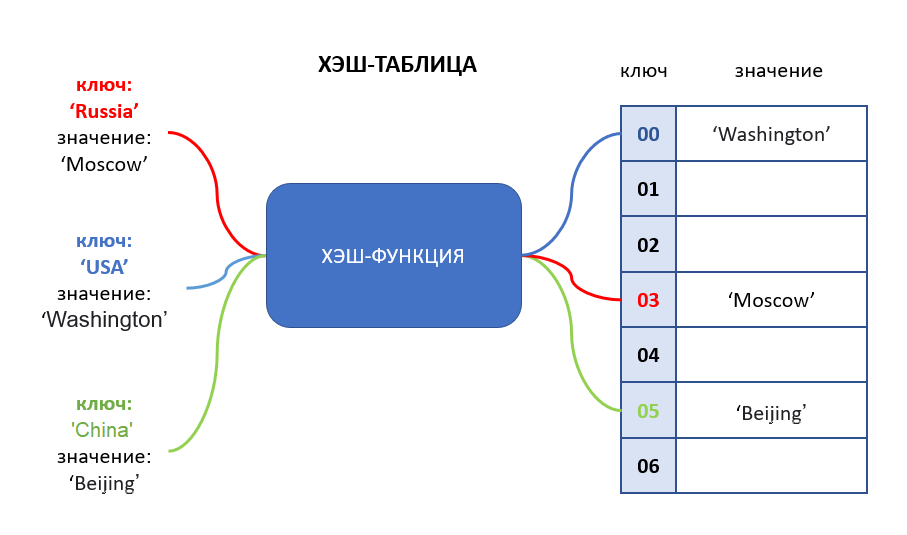

#### Коллизии

Ключом в ассоциативном массиве может быть абсолютно любая строка, любой длины и содержания. Но здесь есть одно противоречие:

* всех возможных ключей — это бесконечное множество;
* в качестве результата хеш-функция выдает строку фиксированной длины, то есть все выходные значения — это конечное множество.

Из этого факта следует, что не для всех входных данных найдется уникальный хеш. На каком-то этапе могут появиться дубли: под одним хешем будут лежать несколько разных значений.

Такую ситуацию принято называть **коллизией**. Есть несколько способов разрешения коллизий. Каждому способу соответствует свой тип хеш-таблицы:

In [ ]:
# Пример коллизии
# Хеш-функция возвращает одинаковый хеш для разных строчных данных
print(zlib.crc32(b'aaaaa0.462031558722291'))  # 1938556049
print(zlib.crc32(b'aaaaa0.0585754039730588'))  # 1938556049

1938556049
1938556049


Простейший способ разрешения коллизий — это открытая адресация. Она предполагает последовательное перемещение по слотам хеш-таблицы в поисках первого свободного слота, куда значение и будет записано.

В примере выше открытая адресация сработает так. Сначала интерпретатор положит первое значение в ячейку 1938556049. Затем интерпретатор возьмет второе значение и проверит для него хеш 1938556050. Если хеш занят, то интерпретатор попробует проверить хеш 1938556051. Так он будет продвигаться до первого незанятого хеша.

**Итак**, словари в Python хранятся с помощью ассоциативного массива. С помощью хеш-функции исходный ключ преобразуется в число, которое используется потом в качестве индекса массива.